# Statystyka i prawdopodobieństwo

In [3]:
import numpy as np
import pandas as pd
from scipy import stats as sps

import matplotlib.pyplot as plt

## Statystyka opisowa

In [28]:
# data = np.loadtxt("../data/napoje.csv", delimiter=';', skiprows=1) 

In [71]:
data = pd.read_csv("../data/napoje.csv", sep=';')

In [72]:
data.describe()

mies          rok          pepsi         fanta         żywiec  \
count  192.000000   192.000000     192.000000    192.000000     192.000000   
mean     6.500000  2008.500000  111414.692708  43395.593750  176803.380208   
std      3.461078     4.621824    5399.065735   5209.659958    4641.824492   
min      1.000000  2001.000000   96794.000000  23842.000000  163076.000000   
25%      3.750000  2004.750000  108112.500000  39619.250000  173863.750000   
50%      6.500000  2008.500000  110998.500000  43490.500000  176816.500000   
75%      9.250000  2012.250000  114830.500000  46902.000000  180477.750000   
max     12.000000  2016.000000  125202.000000  55207.000000  188616.000000   

             okocim    regionalne           cola          lech  
count    192.000000    192.000000     192.000000    192.000000  
mean   60679.833333  48668.036458  226389.468750  61091.348958  
std     4707.448276   4105.883349    9515.508337   4976.587851  
min    47383.000000  40573.000000  198005.000000  49331.000000  
25%    58005.500000  45615.750000  220685.250000  57373.750000  
50%    61157.000000  48085.000000  225884.500000  61048.000000  
75%    64022.750000  50587.500000  232890.250000  64815.750000  
max    70664.000000  62510.000000  254776.000000  75540.000000

In [82]:
numbers = np.array([2,3,5,7,11,13,17,19])

In [53]:
# średnia arytmetyczna
mu = np.mean(numbers)
numbers.sum() / numbers.shape[0]

8.285714285714286

In [75]:
# wariancja
np.var(numbers) == np.mean((numbers - mu)**2)

False

In [77]:
#odchylenie standardowe
np.std(numbers) == np.sqrt(np.var(numbers))

True

In [93]:
# Percentyl 
# Percentyl 25 == pierwszy (dolny) kwartyl - Q1
# Percentyl 50 == mediana - Q2
# Percentyl 75 == 3 (górny) kwartyl - Q3
np.percentile(numbers, 25, method='nearest')

5

In [96]:
# ?np.percentile

In [100]:
q = 10
median = np.percentile(data['pepsi'], q)
lower_median = np.percentile(data['pepsi'], q, method='lower')
higher_median = np.percentile(data['pepsi'], q, method='higher')
print(f"percentile({q}) = {median:.2f} (between {lower_median} and {higher_median})")

midpoint_median = np.percentile(data['pepsi'], q, method='midpoint') 

percentile(10) = 104681.70 (between 104680 and 104697)


In [103]:
midpoint_median == np.mean([lower_median, higher_median])

True

In [116]:
q1 = np.percentile(data[['pepsi']], 50)


110998.5

In [117]:
data[['pepsi']].mean()

pepsi    111414.692708
dtype: float64

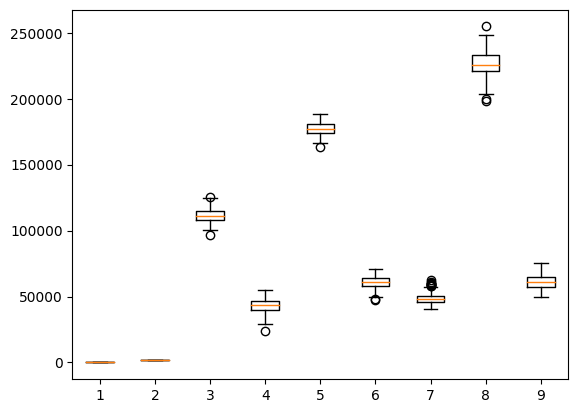

In [150]:
plt.boxplot(data);

In [71]:
stats.mode(data['mies'], keepdims=False)

ModeResult(mode=1, count=16)

### Zadanie nr 7

In [147]:
numbers_ex7 = np.random.normal(20, 10, 1000)
numbers_ex7.mean()

19.647472657935992

In [148]:
np.percentile(numbers_ex7, 50)

19.624301384433195

### Zadanie nr 8

In [169]:
numbers_ex8 = np.random.normal(20, 10, 100000)

In [170]:
print(np.mean(numbers_ex8).round(15).round(4))
print(np.std(numbers_ex8).round(15).round(4))

19.9902
10.0058


In [171]:
normalized_numbers_ex8 = (numbers_ex8 - np.mean(numbers_ex8)) / np.std(numbers_ex8)

In [172]:
print(np.mean(normalized_numbers_ex8).round(15))
print(np.std(normalized_numbers_ex8).round(15))

-0.0
1.0


### Zadanie nr 9

In [179]:
def euclidesian_distance(v1, v2):
    return np.sqrt(sum((v2 - v1)**2))
    
    

In [182]:
v1 = np.array([1, 2])
v2 = np.array([2, 1])

In [185]:
euclidesian_distance(v1, v2)

1.4142135623730951

### Różne rodzaje średnich

In [186]:
# plt.hist(np.random.exponential(100, 1000000), bins=100);

In [187]:
mean_data =  np.random.exponential(100, 1000000) # data['regionalne']
weights = np.random.uniform(200, 10,  1000000) # data['mies']

In [188]:
arithmetic_mean = np.average(mean_data)

In [189]:
weighted_mean =  np.average(mean_data, weights=weights)

In [190]:
harmonic_mean = sps.hmean(mean_data)

In [191]:
geometric_mean = sps.mstats.gmean(mean_data)

In [192]:
median = np.median(mean_data)

In [193]:
plt.hist(mean_data, bins=30, color=[(0.9,0.9,0.9)])
plt.axvline(x=arithmetic_mean, c ='red')
plt.axvline(x=weighted_mean, c ='blue')
plt.axvline(x=harmonic_mean, c ='yellow')
plt.axvline(x=geometric_mean, c ='green')
plt.axvline(x=median, c ='brown')

### Skośność i kurtoza

In [196]:
exp_distr =  np.random.exponential(100, 1000000) # data['regionalne']
norm_distr = np.random.normal(200, 10,  1000000) # data['mies']

In [205]:
sps.skew(100 - exp_distr)

-1.9881357576252807

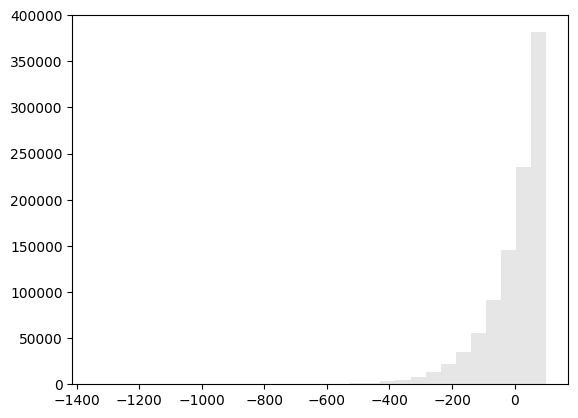

In [204]:
plt.hist(100 - exp_distr, bins=30, color=[(0.9,0.9,0.9)]);

In [207]:
sps.kurtosis(norm_distr)

-0.0025503986595190042

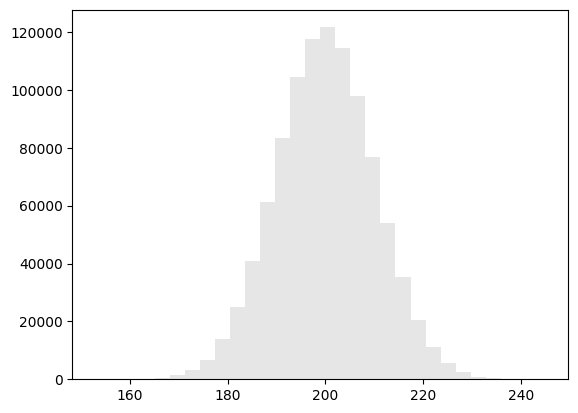

In [200]:
plt.hist(norm_distr, bins=30, color=[(0.9,0.9,0.9)]);